# Half-width of a normal distirbution

We can obtain an intuitive understanding of the parameter $\sigma$ for the
Normal distribution family $\mathcal{N}(\mu,\sigma)$,
if we think of the concept of "half-width" for any probability density function.

Let's start by creating an example random variable.

In [1]:
from scipy.stats.distributions import norm

mu = 1000
sigma = 100

rvN = norm(mu, sigma)

## Plot pdf

<AxesSubplot:xlabel='x', ylabel='$f_{X}$'>

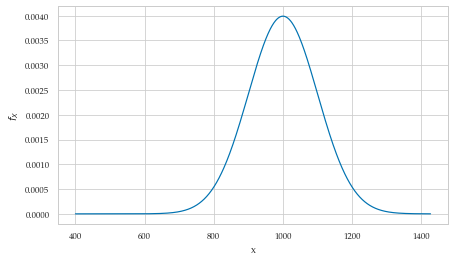

In [2]:
from plot_helpers import plot_pdf
plot_pdf(rvN)

## Calculate the max-height of the pdf

In [3]:
from scipy.optimize import minimize

We first find the location where the function `rvN.pdf` reaches it's maximum,
which is called written $\textrm{argmax} f_N$ in math notation.

In [4]:
def negativefN(n):
    return -1*rvN.pdf(n)

res = minimize(negativefN, x0=980.0, method="Nelder-Mead")
print(res)


# maximum value of the pdf f_N is located at n=
argmax_fN = res.x[0]
argmax_fN

 final_simplex: (array([[ 999.99999046],
       [1000.00008392]]), array([-0.00398942, -0.00398942]))
           fun: -0.003989422804014309
       message: 'Optimization terminated successfully.'
          nfev: 40
           nit: 20
        status: 0
       success: True
             x: array([999.99999046])


999.9999904632568

The value of the function at it's maximum is written $\textrm{max} f_N$
and obtained by evaluating the function at its argmax.

In [5]:
max_fN = rvN.pdf(argmax_fN)
max_fN

0.003989422804014309

The notion of half-width of a distribution,
describes the width of the distribution at as measured from the points points where
it reaches half of it's maximum value.

To find the half-width,
we start by first finding the half-height.

In [6]:
half_height = max_fN / 2
half_height

0.0019947114020071547

We must now find the values $n_l$ and $n_r$,
where $f_N(n) =$ `rvN.pdf(n)` equals the half-height.

Since there are two values of $n$ that satisfy $f_N(n) =$ half-height,
we'll call the two solutions $n_l$ and $n_r$.

In [8]:
from scipy.optimize import root

def inverse_pdf(x, p):
    err = rvN.pdf(x) - p
    return err

res = root(inverse_pdf, x0=[990], args=(half_height))
n_l = res.x[0]
n_l

882.2589977484522

In [9]:
res = root(inverse_pdf, x0=[1010], args=(half_height))
n_r = res.x[0]
n_r

1117.7410022515478

We calculate the half width as half of the width of the distribution,
meaning half of the distance from $n_l$ to $n_r$.

In [15]:
half_width = (n_r - n_l) / 2
half_width

117.7410022515478

We observe that the half width of the distribution (a purely geometrical, look-at-the-graph quantity) is approximately equal to the standard deviation of the distribution $\sigma=100$.

The half-width interpretation for $\sigma$ is accurate to < 20%, so don't use it for any numerical calculations, but still good as general concept.